In [3]:
import os

import pandas as pd
import seaborn as sns

In [19]:
cpa_dir = "/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/results/cpa"
id_dir = "/lustre/groups/ml01/workspace/ot_perturbation/data/combosciplex/results/identity"
genot_dir = None
otfm_dir = None

In [20]:
model_dirs = {"CPA": cpa_dir, "id": id_dir}

In [11]:
metrics_files = {"ood_encoded": "ood_metrics_encoded.csv", "ood_decoded": "ood_metrics_decoded.csv"}

In [25]:
metrics_file = "ood_metrics_encoded.csv"
dfs = {}
for model, model_dir in model_dirs.items():
    dfs[model] = pd.read_csv(os.path.join(model_dir, metrics_file), index_col=0)
    dfs[model]["model"] = model

In [28]:
result_df = pd.concat(dfs.values(), ignore_index=False)

In [36]:
result_df["metric"] = result_df.index

In [43]:
metrics = result_df["metric"].unique()

In [37]:
result_df

,Cediranib+PCI-34051,Givinostat+SRT1720,Panobinostat+Crizotinib,Panobinostat+PCI-34051,SRT2104+Alvespimycin,model,metric
r_squared,0.512775,0.145153,0.536919,0.528108,0.585622,CPA,r_squared
sinkhorn_div_1,13.288227,13.870828,21.460855,18.659237,12.850885,CPA,sinkhorn_div_1
sinkhorn_div_10,7.638247,7.945141,16.447922,13.263216,6.213585,CPA,sinkhorn_div_10
sinkhorn_div_100,6.761440,7.092617,15.193371,12.024872,5.475540,CPA,sinkhorn_div_100
e_distance,13.319667,13.984304,30.044826,23.741077,10.800750,CPA,e_distance
mmd,0.095916,0.098685,0.180695,0.162800,0.109682,CPA,mmd
r_squared,0.974681,0.422534,-1.467268,-1.782773,0.357131,id,r_squared
sinkhorn_div_1,10.584558,16.048632,98.848442,88.604652,20.836151,id,sinkhorn_div_1
sinkhorn_div_10,0.694153,5.318348,83.956665,73.687218,9.254139,id,sinkhorn_div_10
sinkhorn_div_100,0.356144,4.751503,80.447540,70.368889,8.431534,id,sinkhorn_div_100


In [40]:
df2 = pd.melt(result_df, id_vars=["model", "metric"])

In [41]:
df2.head()

,model,metric,variable,value
0,CPA,r_squared,Cediranib+PCI-34051,0.512775
1,CPA,sinkhorn_div_1,Cediranib+PCI-34051,13.288227
2,CPA,sinkhorn_div_10,Cediranib+PCI-34051,7.638247
3,CPA,sinkhorn_div_100,Cediranib+PCI-34051,6.761440
4,CPA,e_distance,Cediranib+PCI-34051,13.319667


In [47]:
import matplotlib.pyplot as plt
import numpy as np

/tmp/ipykernel_3031410/1429008180.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/tmp/ipykernel_3031410/1429008180.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/tmp/ipykernel_3031410/1429008180.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/tmp/ipykernel_3031410/1429008180.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/tmp/ipykernel_3031410/1429008180.py:13: UserWarning: set_ti

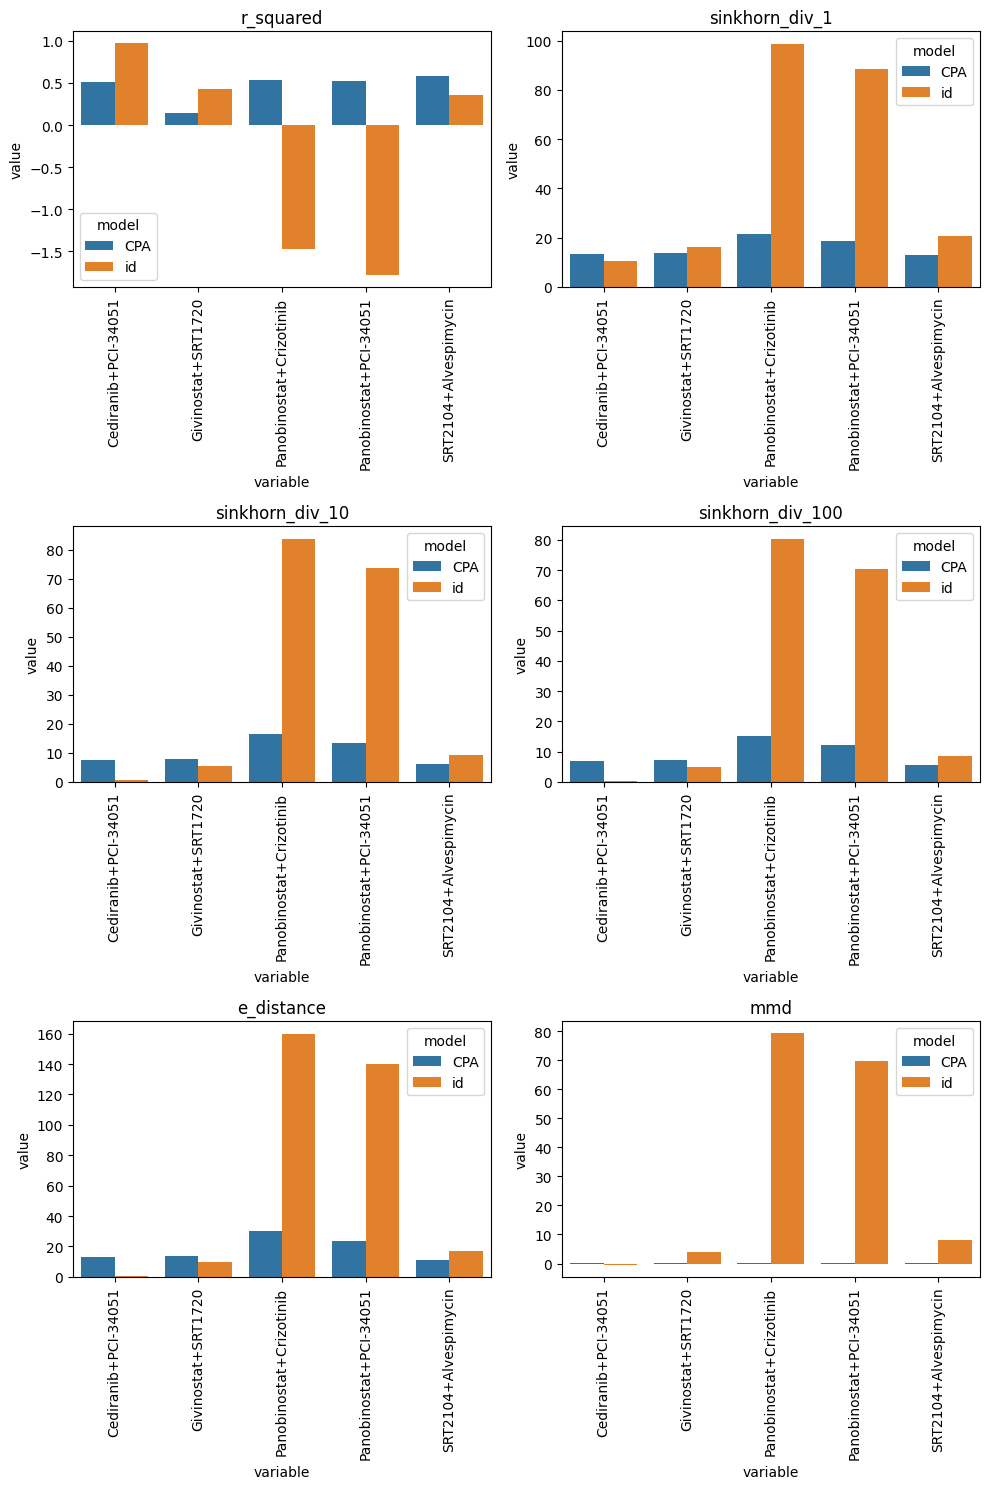

In [53]:
k = len(metrics)

fig, axes = plt.subplots(nrows=int(np.ceil(k / 2)), ncols=2, figsize=(10, 15))  # Adjust layout format
axes = axes.flatten()  # Flatten if more than one row

# Loop through categories and plot each as a barplot
for i, metric in enumerate(metrics):
    # Filter the DataFrame
    subset = df2[df2["metric"] == metric]
    # Create the barplot
    sns.barplot(subset, x="variable", y="value", hue="model", ax=axes[i])
    axes[i].set_title(f"{metric}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

/tmp/ipykernel_3031410/1240271388.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/tmp/ipykernel_3031410/1240271388.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/tmp/ipykernel_3031410/1240271388.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/tmp/ipykernel_3031410/1240271388.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
/tmp/ipykernel_3031410/1240271388.py:13: UserWarning: set_ti

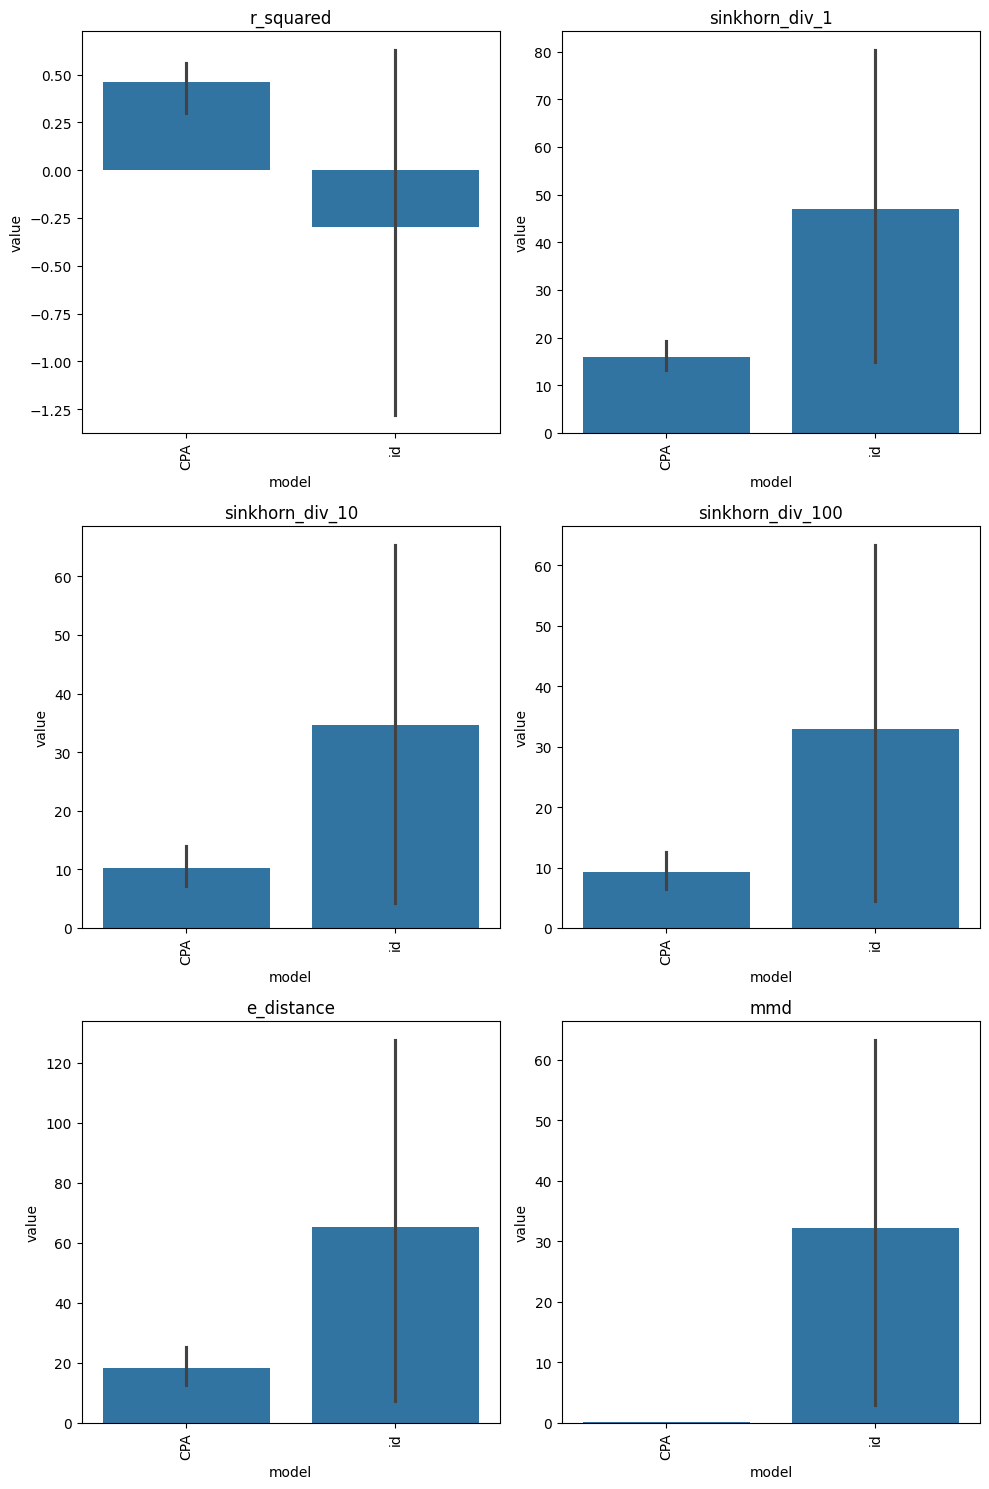

In [55]:
k = len(metrics)

fig, axes = plt.subplots(nrows=int(np.ceil(k / 2)), ncols=2, figsize=(10, 15))  # Adjust layout format
axes = axes.flatten()  # Flatten if more than one row

# Loop through categories and plot each as a barplot
for i, metric in enumerate(metrics):
    # Filter the DataFrame
    subset = df2[df2["metric"] == metric]
    # Create the barplot
    sns.barplot(subset, x="model", y="value", ax=axes[i])
    axes[i].set_title(f"{metric}")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()